In [ ]:
#Before you start :
#These exercises are related to the Pivot table and correlation lessons.
#Keep in mind that you need to use some of the functions you learned in the previous lessons.
#Elaborate your codes and outputs as much as you can.
#Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
#Import all the necessary libraries here:


In [ ]:
# Libraries

import pandas as np
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
 
 
def create_color(r, g, b):
    return [r/256, g/256, b/256]
 
def get_custom_color_palette():
    return LinearSegmentedColormap.from_list("", [
        create_color(227, 101, 33), create_color(246, 145, 53), create_color(251, 168, 74),
        create_color(218, 212, 200),
        create_color(141, 193, 223), create_color(114, 167, 208), create_color(43, 92, 138)
    ])
 
low, high = -5, 15
data = np.random.uniform(low, high, (10, 15))
 
cmap = get_custom_color_palette()
sns.heatmap(data, cmap=cmap, center=0);



In [1]:

#Challenge 1
#Read the employees dataset
#Save your data in a variable called employees.


employees = pd.read_csv('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Module 2/Lab5/employees.csv')
employees

# your code here


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [4]:
#What's the mean Salary by Department?
#Tip: There are 2 ways to do it: with or without pivot tables. Do it both ways.

# Method 1
# your code here

employees.pivot_table(index="Department", values="Salary", aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# Method 2
# your code here


employees.groupby(["Department"])["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [6]:
#Now, group the data by more than one column. Use Pandas pivot table function to select the mean Salary by Department and Title.
# your code here

employees.pivot_table(index=("Department", "Title"), values="Salary", aggfunc='mean')


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

In [8]:
#Display the number of Years of work experience and the Salary for each Title. Add Years as a column in your pivot table.
#Hint: Use Pandas documentation to explore the pivot table function.

# your code here
employees.pivot_table(index=("Title"), values=("Years", "Salary"), aggfunc='mean').round(0)

,Salary,Years
Title,,
VP,70.0,8.0
analyst,32.0,2.0
associate,57.0,4.0


In [15]:
#Find the mean Salary and number of employees in each Department and for each job Title.
# your code here

employees.pivot_table(index=("Department","Title"), values=("Salary"), aggfunc=('mean', 'count')).round(0)




count  mean
Department Title                 
HR         VP             1  70.0
           analyst        2  32.0
IT         VP             1  70.0
           analyst        2  32.0
           associate      1  60.0
Sales      associate      2  55.0

In [17]:
#For each Department and each job Title, find the Salary median, minimum, maximum and standard deviation. Comment your results.
# your code here

employees.pivot_table(index=("Department","Title"), values=("Salary"), aggfunc=('median', 'min', 'max', 'std')).round(0).fillna('-')


max  median  min  std
Department Title                           
HR         VP          70    70.0   70    -
           analyst     35    32.0   30  4.0
IT         VP          70    70.0   70    -
           analyst     35    32.0   30  4.0
           associate   60    60.0   60    -
Sales      associate   55    55.0   55  0.0

In [ ]:
#Based on your comments, fill the missing values with an appropriate value.
# your code here


In [18]:
#The stake holders want to know, for each Department, the number of employees and how much money is spent on salaries. Could you provide that information?
# your code here

employees.pivot_table(index=("Department"), values=("Salary"), aggfunc=('count', 'sum')).round(0).fillna('-')

,count,sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


In [21]:
#For each Department and Title, find the the total years of work experience and the mean Salary.
# your code here
employees.pivot_table(index=("Department","Title"), values=("Years", "Salary"), aggfunc=('sum', 'mean')).round(0).fillna('-')

Salary      Years    
                       mean  sum  mean sum
Department Title                          
HR         VP          70.0   70   8.0   8
           analyst     32.0   65   3.0   6
IT         VP          70.0   70   8.0   8
           analyst     32.0   65   2.0   3
           associate   60.0   60   7.0   7
Sales      associate   55.0  110   2.0   5

In [ ]:
Bonus Challenge 1
Compute the mean Salary after removing the maximum Salary for each Department. Create the appropriate pivot table.
Hint: Write a custom function.

# your code here


In [22]:
#Challenge 2
#Read the fitbit dataset
#Save your data in a variable called fitbit.

# your code here
fitbit = pd.read_csv('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Module 2/Lab5/fitbit.csv')
fitbit


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


In [23]:
#Explore you dataset in terms of data types and descriptive statistics.
#Hint: Use Pandas functions from previous lectures.

# your code here


fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [25]:
fitbit.describe().round(0)

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0,367.0
mean,2742.0,10122.0,9.0,12.0,564.0,236.0,26.0,36.0,2044.0,290.0,28.0,16.0,321.0
std,916.0,5595.0,3.0,10.0,295.0,87.0,20.0,31.0,2041.0,155.0,19.0,11.0,171.0
min,179.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2698.0,6730.0,6.0,5.0,520.0,179.0,8.0,10.0,1218.0,224.0,14.0,7.0,248.0
50%,2974.0,10413.0,8.0,11.0,663.0,226.0,24.0,29.0,1553.0,337.0,29.0,16.0,370.0
75%,3233.0,13916.0,11.0,16.0,756.0,290.0,42.0,54.0,1928.0,400.0,42.0,24.0,440.0
max,4351.0,26444.0,20.0,101.0,998.0,472.0,101.0,153.0,9830.0,553.0,78.0,45.0,607.0


In [26]:
#You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.
# your code here

fitbit["Minutes Very Active"].corr(fitbit["Steps"])


0.5714518481062612

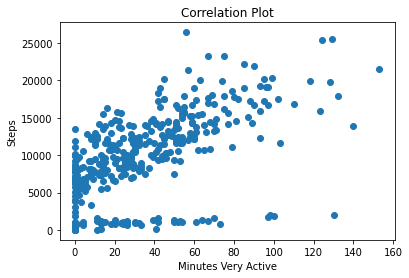

In [28]:
#Use matplotlib to visually plot Minutes Very active vs Steps. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments.

import matplotlib.pyplot as plt

plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Correlation Plot")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()



In [ ]:
#What can you say about Minutes Very Active and Steps? Write a comment below.

#It's kind of counter-intuitive but the correlation is not very high...


In [29]:
#We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.
# your code here

fitbit["Minutes Sedentary"].corr(fitbit["Steps"])


0.07690608062990098

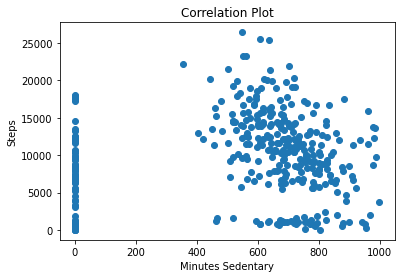

In [30]:
#Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?
# your code here

plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Correlation Plot")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()


In [31]:
#We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.
# your code here


fitbit["MinutesOfSleep"].corr(fitbit["Steps"])


0.1309856595083637

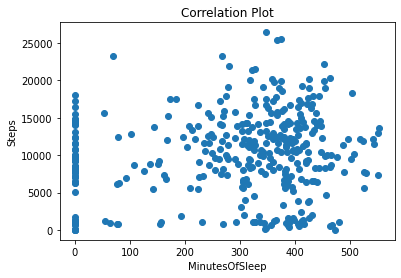

In [32]:
#Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?
# your code here

plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("Correlation Plot")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()


<AxesSubplot:>

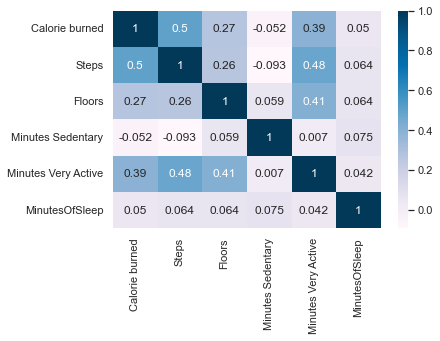

In [40]:
#Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable cor_fit.

# your code here

columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

sns.heatmap(fitbit[columns].corr(method="kendall"), annot=True, cmap="PuBu")

In [42]:
#Based on the result of the correlation matrix, which of the features are highly correlated with variable Steps?
#Hint: sort the correlations of Steps vs the rest of the features in descending order. You can use Pandas sort_values.

# your code here
#It appears Steps are quite correlated (circa 0.5) with Calorie Burned and Minutes Very Active


In [46]:
#Challenge 3
#Read the time_grades dataset from Ironhack's database:

#db: time_grades
#table: time_grades
#Save your data in a variable called time_grades.

# your code here

time_grades = pd.read_csv('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Module 2/Lab5/time_grades.csv')
time_grades.describe().round(0)


,Study time,Grade
count,15.0,15.0
mean,9.0,6.0
std,5.0,3.0
min,2.0,1.0
25%,6.0,4.0
50%,8.0,7.0
75%,12.0,8.0
max,20.0,9.0


In [47]:
time_grades.head(10)

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


In [54]:
#Show visually the frequency distribution of the time_grades dataset.
# your code here

distribution = time_grades.groupby("Grade")["Name"].count()
distribution


Grade
1    1
2    1
3    2
4    1
5    1
7    4
8    2
9    3
Name: Name, dtype: int64

<AxesSubplot:xlabel='Grade'>

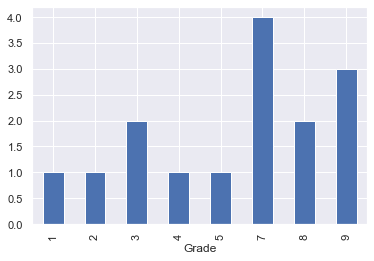

In [55]:
distribution.plot.bar()

In [56]:
#Is there a correlation between Study time and Grade? Use both Pearson and Spearman correlations and comment your results.
# your code here

time_grades["Grade"].corr(time_grades["Study time"])



0.7980456073578858

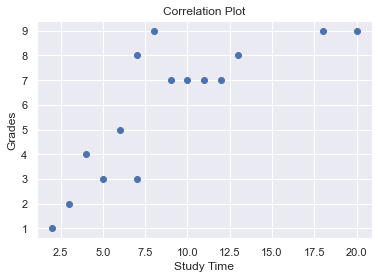

In [57]:
#Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?
# your code here


plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title("Correlation Plot")
plt.xlabel("Study Time")
plt.ylabel("Grades")
plt.show()



In [ ]:
#Could you explain the difference between Pearson and Spearman correlations?

#Pearson vs Spearman correlation?
#Both Pearson and Spearman are used for measuring the correlation but the difference between them lies in the kind of analysis we want.

#Pearson correlation: Pearson correlation evaluates the linear relationship between two continuous variables.

#Spearman correlation: Spearman correlation evaluates the monotonic relationship. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

In [1]:
#AND NOW: CROSSTABS !

### 1. Import the moovies dataset
#source: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset"

movies = pd.read_csv('C:/Users/olivi/Documents/Ironhack/IRONLABS_OM/Module 2/Lab5/movie_metadata.csv')
movies.describe().round(0)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.0,5028.0,4939.0,5020.0,5036.0,4159.0,5043.0,5043.0,5030.0,5022.0,4.551000e+03,4935.0,5030.0,5043.0,4714.0,5043.0
mean,140.0,107.0,687.0,645.0,6560.0,48468408.0,83668.0,9699.0,1.0,273.0,3.975262e+07,2002.0,1652.0,6.0,2.0,7526.0
std,122.0,25.0,2813.0,1665.0,15021.0,68452990.0,138485.0,18164.0,2.0,378.0,2.061149e+08,12.0,4042.0,1.0,1.0,19320.0
min,1.0,7.0,0.0,0.0,0.0,162.0,5.0,0.0,0.0,1.0,2.180000e+02,1916.0,0.0,2.0,1.0,0.0
25%,50.0,93.0,7.0,133.0,614.0,5340988.0,8594.0,1411.0,0.0,65.0,6.000000e+06,1999.0,281.0,6.0,2.0,0.0
50%,110.0,103.0,49.0,372.0,988.0,25517500.0,34359.0,3090.0,1.0,156.0,2.000000e+07,2005.0,595.0,7.0,2.0,166.0
75%,195.0,118.0,194.0,636.0,11000.0,62309438.0,96309.0,13756.0,2.0,326.0,4.500000e+07,2011.0,918.0,7.0,2.0,3000.0
max,813.0,511.0,23000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,5060.0,1.221550e+10,2016.0,137000.0,10.0,16.0,349000.0


In [2]:
movies.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [9]:
### 2. Use crosstabs to show the number of moovies per country"

pd.crosstab(movies.index, movies.country).sum()

country
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
Bahamas                    1
                        ... 
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
Length: 65, dtype: int64

In [20]:
#3. Create a crosstab to show the number of films per director and genre splitted by country"

pd.crosstab(index=(movies.genres, movies.director_name), columns= movies.country, values= movies.index, aggfunc='sum', dropna=True)

TypeError: can only concatenate tuple (not "list") to tuple

In [28]:
# 4. Average duration of filmes grouped by color"

pd.crosstab(index=movies.country, columns= movies.color, values = movies.duration, aggfunc='mean').round(0).fillna('-')

color,Black and White,Color
country,,
Afghanistan,-,83.0
Argentina,-,108.0
Aruba,-,91.0
Australia,87.0,106.0
Bahamas,-,94.0
...,...,...
Turkey,-,122.0
UK,126.0,109.0
USA,109.0,106.0


In [32]:
### 5. Average number of likes per director (assuming that total film's likes are counted as a sum of actor's likes)"

movies["total_likes"]= movies["actor_1_facebook_likes"] + movies["actor_2_facebook_likes"]

pd.crosstab(index=movies.director_name, columns= movies.color, values = movies.total_likes, aggfunc='mean').round(0).fillna('-')



color,Black and White,Color
director_name,,
A. Raven Cruz,-,1000.0
Aaron Hann,-,312.0
Aaron Schneider,-,16000.0
Aaron Seltzer,-,3869.0
Abel Ferrara,-,1599.0
...,...,...
Zoran Lisinac,-,728.0
Álex de la Iglesia,-,600.0
Émile Gaudreault,-,846.0
